In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/sales_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/sales-dataset/sales_data.csv")
df

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [4]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [5]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [6]:
df.duplicated().sum()

0

In [7]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df.head(5)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


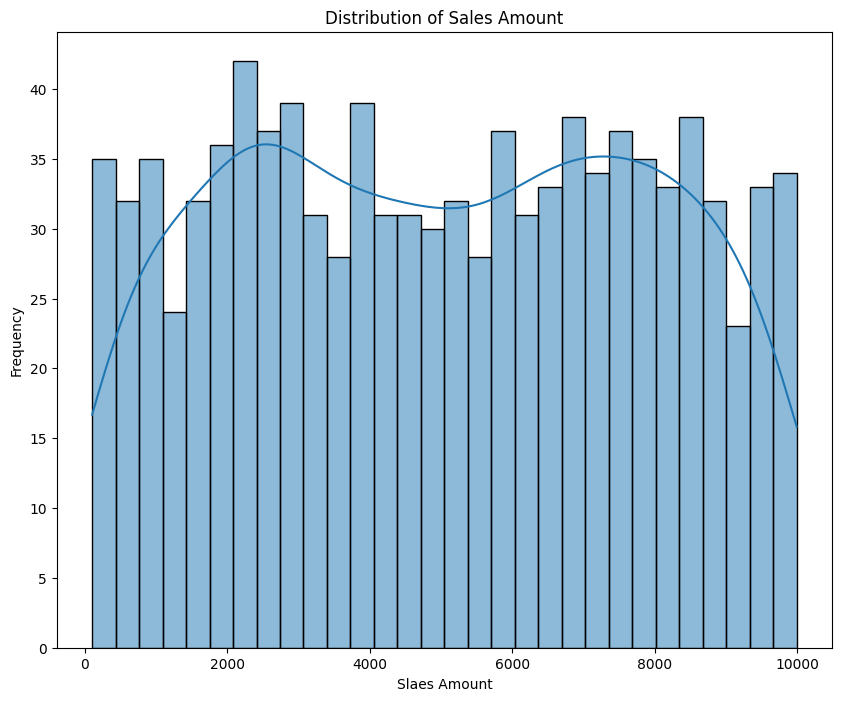

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(df['Sales_Amount'], bins=30, kde=True)
plt.xlabel('Slaes Amount')
plt.ylabel('Frequency')
plt.title("Distribution of Sales Amount")
plt.show()

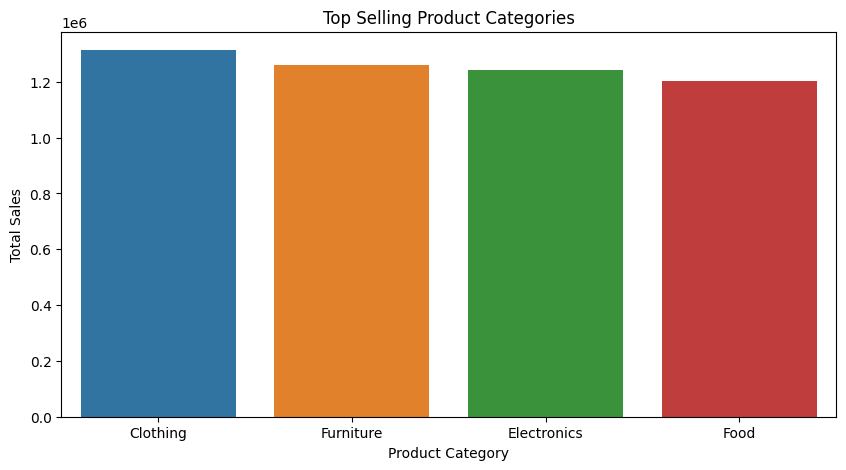

In [10]:
top_products = df.groupby('Product_Category')["Sales_Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top Selling Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

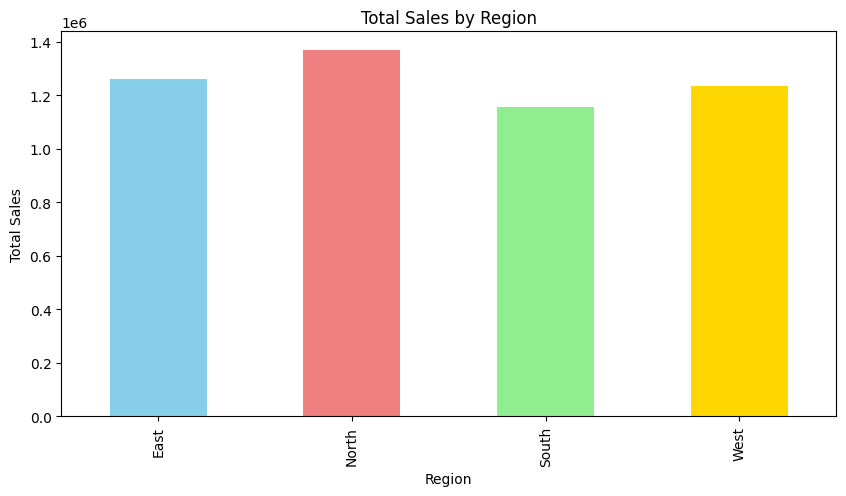

In [11]:
region_sales = df.groupby("Region")["Sales_Amount"].sum()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

plt.figure(figsize=(10,5))
region_sales.plot(kind='bar', color= colors)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel('Total Sales')
plt.show()

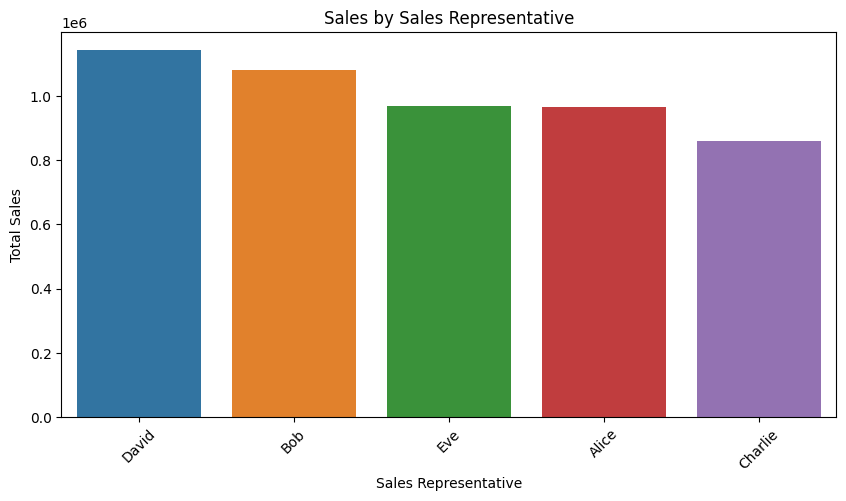

In [12]:
sales_rep_performance = df.groupby('Sales_Rep')["Sales_Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=sales_rep_performance.index, y=sales_rep_performance.values)
plt.title("Sales by Sales Representative")
plt.xlabel("Sales Representative")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [13]:
df["Profit"] = df["Sales_Amount"] - (df["Unit_Cost"] * df["Quantity_Sold"])
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2304.47
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,-60494.61
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,-3215.57
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,-166703.23
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,-4535.61


In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['Sales_Rep', 'Region', 'Product_Category', 'Customer_Type',
       'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df["Customer_Type"] = label_encoder.fit_transform(df["Customer_Type"])


print(df["Customer_Type"].unique())


[1 0]


In [16]:
for col in categorical_cols:
    print(f"Average Sales by {col}:")
    print(df.groupby(col)['Sales_Amount'].mean(), "\n")


Average Sales by Sales_Rep:
Sales_Rep
Alice      5028.863385
Bob        5197.070337
Charlie    5093.559053
David      5142.961081
Eve        4642.028660
Name: Sales_Amount, dtype: float64 

Average Sales by Region:
Region
East     4790.087186
North    5129.634869
South    5107.304690
West     5063.971025
Name: Sales_Amount, dtype: float64 

Average Sales by Product_Category:
Product_Category
Clothing       4901.023731
Electronics    5054.876585
Food           5317.582035
Furniture      4848.144962
Name: Sales_Amount, dtype: float64 

Average Sales by Customer_Type:
Customer_Type
0    4972.734722
1    5066.546230
Name: Sales_Amount, dtype: float64 

Average Sales by Payment_Method:
Payment_Method
Bank Transfer    5021.529737
Cash             4933.988946
Credit Card      5094.387014
Name: Sales_Amount, dtype: float64 

Average Sales by Sales_Channel:
Sales_Channel
Online    5038.594119
Retail    5000.842383
Name: Sales_Amount, dtype: float64 

Average Sales by Region_and_Sales_Rep:
Regio

In [17]:


drop_categorical = ['Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep']
df = df.drop(columns=drop_categorical)

print("Dropped columns:", drop_categorical)


Dropped columns: ['Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep']


In [18]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,1,0.09,2304.47
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,1,0.11,-60494.61
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,1,0.20,-3215.57
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,0,0.02,-166703.23
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,0,0.08,-4535.61


In [19]:
df['Region'].unique()

array(['North', 'West', 'South', 'East'], dtype=object)

In [20]:
df = pd.get_dummies(df, columns=['Sales_Rep', 'Region', 'Product_Category'], drop_first=True)
df.head()

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Customer_Type,Discount,Profit,Sales_Rep_Bob,Sales_Rep_Charlie,Sales_Rep_David,Sales_Rep_Eve,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture
0,1052,2023-02-03,5053.97,18,152.75,267.22,1,0.09,2304.47,True,False,False,False,True,False,False,False,False,True
1,1093,2023-04-21,4384.02,17,3816.39,4209.44,1,0.11,-60494.61,True,False,False,False,False,False,True,False,False,True
2,1015,2023-09-21,4631.23,30,261.56,371.40,1,0.20,-3215.57,False,False,True,False,False,True,False,False,True,False
3,1072,2023-08-24,2167.94,39,4330.03,4467.75,0,0.02,-166703.23,True,False,False,False,False,True,False,False,False,False
4,1061,2023-03-24,3750.20,13,637.37,692.71,0,0.08,-4535.61,False,True,False,False,False,False,False,True,False,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Product_ID                    1000 non-null   int64         
 1   Sale_Date                     1000 non-null   datetime64[ns]
 2   Sales_Amount                  1000 non-null   float64       
 3   Quantity_Sold                 1000 non-null   int64         
 4   Unit_Cost                     1000 non-null   float64       
 5   Unit_Price                    1000 non-null   float64       
 6   Customer_Type                 1000 non-null   int64         
 7   Discount                      1000 non-null   float64       
 8   Profit                        1000 non-null   float64       
 9   Sales_Rep_Bob                 1000 non-null   bool          
 10  Sales_Rep_Charlie             1000 non-null   bool          
 11  Sales_Rep_David               1

In [22]:
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
print("Boolean Columns:", bool_cols)

for col in bool_cols:
    df[col] = df[col].astype(int)

print(df.dtypes)

Boolean Columns: ['Sales_Rep_Bob', 'Sales_Rep_Charlie', 'Sales_Rep_David', 'Sales_Rep_Eve', 'Region_North', 'Region_South', 'Region_West', 'Product_Category_Electronics', 'Product_Category_Food', 'Product_Category_Furniture']
Product_ID                               int64
Sale_Date                       datetime64[ns]
Sales_Amount                           float64
Quantity_Sold                            int64
Unit_Cost                              float64
Unit_Price                             float64
Customer_Type                            int64
Discount                               float64
Profit                                 float64
Sales_Rep_Bob                            int64
Sales_Rep_Charlie                        int64
Sales_Rep_David                          int64
Sales_Rep_Eve                            int64
Region_North                             int64
Region_South                             int64
Region_West                              int64
Product_Category_Elect

In [23]:
df = df.drop(columns=['Sale_Date'])


In [24]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

num_cols = ["Quantity_Sold", "Unit_Cost", "Unit_Price", "Discount", "Profit"]

df[num_cols] = scaler.fit_transform(df[num_cols])

In [25]:
df.head()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Customer_Type,Discount,Profit,Sales_Rep_Bob,Sales_Rep_Charlie,Sales_Rep_David,Sales_Rep_Eve,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture
0,1052,5053.97,-0.519717,-1.638876,-1.734854,1,-0.715842,1.100968,1,0,0,0,1,0,0,0,0,1
1,1093,4384.02,-0.590379,0.946317,1.043921,1,-0.486369,-0.030111,1,0,0,0,0,0,1,0,0,1
2,1015,4631.23,0.328224,-1.562095,-1.661420,1,0.546261,1.001546,0,0,1,0,0,1,0,0,1,0
3,1072,2167.94,0.964180,1.308759,1.225997,0,-1.518998,-1.943042,1,0,0,0,0,1,0,0,0,0
4,1061,3750.20,-0.873026,-1.296911,-1.434937,0,-0.830579,0.977771,0,1,0,0,0,0,0,1,0,0


In [26]:
df['Profit_Margin'] = (df['Unit_Price'] - df['Unit_Cost']) / df['Unit_Price']
df['Discount_Impact'] = df['Discount'] * df['Quantity_Sold']


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Sales_Amount'])
y = df['Sales_Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

print("Training Set Shape:",  X_train.shape)
print("Testing Set Shape:" , X_test.shape)

Training Set Shape: (800, 19)
Testing Set Shape: (200, 19)


In [28]:
df.dtypes

Product_ID                        int64
Sales_Amount                    float64
Quantity_Sold                   float64
Unit_Cost                       float64
Unit_Price                      float64
Customer_Type                     int64
Discount                        float64
Profit                          float64
Sales_Rep_Bob                     int64
Sales_Rep_Charlie                 int64
Sales_Rep_David                   int64
Sales_Rep_Eve                     int64
Region_North                      int64
Region_South                      int64
Region_West                       int64
Product_Category_Electronics      int64
Product_Category_Food             int64
Product_Category_Furniture        int64
Profit_Margin                   float64
Discount_Impact                 float64
dtype: object

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}")


MAE: 2674.8924299760674, MSE: 9177801.991894696


In [30]:
print("Mean Sales Amount:", df["Sales_Amount"].mean())


Mean Sales Amount: 5019.265230000001


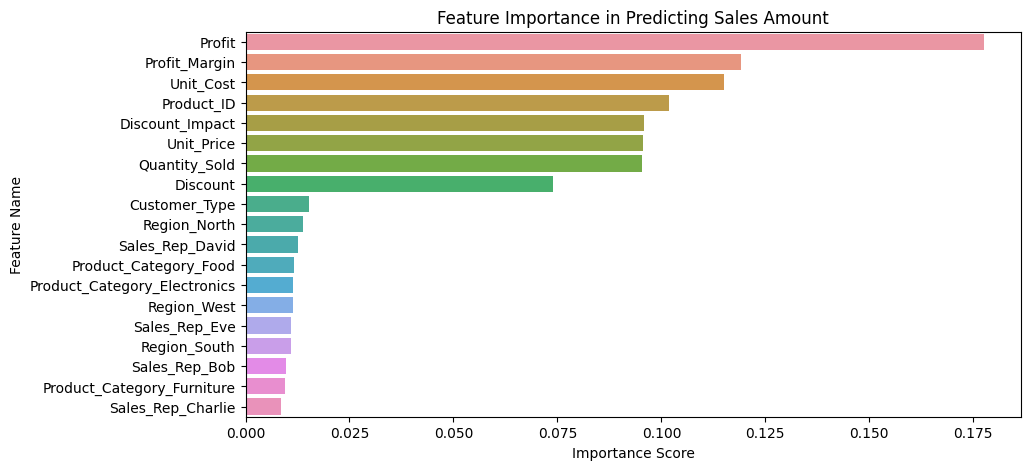

In [31]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Random Forest model to check feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"])
plt.title("Feature Importance in Predicting Sales Amount")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


In [32]:
# Drop features with low importance
low_importance_features = ['Sales_Rep_Bob', 'Sales_Rep_Charlie', 'Sales_Rep_Eve', 'Sales_Rep_David',
                           'Product_Category_Furniture', 'Product_Category_Electronics', 'Product_Category_Food',
                           'Region_North', 'Region_South', 'Region_West']

df = df.drop(columns=low_importance_features)
print("Dropped features:", low_importance_features)


Dropped features: ['Sales_Rep_Bob', 'Sales_Rep_Charlie', 'Sales_Rep_Eve', 'Sales_Rep_David', 'Product_Category_Furniture', 'Product_Category_Electronics', 'Product_Category_Food', 'Region_North', 'Region_South', 'Region_West']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df.drop(columns=['Sales_Amount'])  # Features
y = df['Sales_Amount']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Optimized Random Forest - MAE: {mae_rf}, MSE: {mse_rf}")


Optimized Random Forest - MAE: 2495.3188274999998, MSE: 8625348.746799674


In [34]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples per leaf
}


grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)


mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

print(f"Optimized RF with GridSearch - MAE: {mae_best_rf}, MSE: {mse_best_rf}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized RF with GridSearch - MAE: 2495.755014367531, MSE: 8588006.066858768


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}")

MAE: 2670.5920087659206, MSE: 9102194.642942222


In [36]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}, MSE: {mse_xgb}")


XGBoost - MAE: 2526.3634407226564, MSE: 8966374.132135155
